# Machine learning from scratch: linear regression

## Introduction

In this notebook we will investigate the method of linear regression. We will follow a statistical learning approach. We start by importing some useful scientifc libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We generate (pseudo) random data following a linear trend. For this, we will start by generating linear data and then adding random noise. 

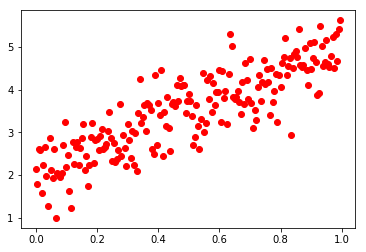

In [2]:
#set the number of observations
num_obs = 200

#We generate random data that follows approximately a straight line with
#known parameters and known fluctuations
X = np.arange(0,1,1/num_obs)
y = 3*X + 2

#Now we add the random fluctuations
noise = np.random.normal(0,0.5,num_obs)
y = y + noise

#Now we plot the data
plt.plot(X,y,'ro')
plt.show()

The model we want to fit to this data is linear: that means that it will be defined by parameters $\alpha,\beta,\gamma$ and the predicting line is then given by $\ell = \{ (x_1,x_2):\ \alpha +x_1\beta +x_2\gamma =0 \}$. If we assume that $\gamma\neq 0$ then we can reparametrize our model as $\ell=\{ (x_1,x_2): x_2 = f(x_1)=\theta_0+x_1\theta_1\}$.

## The model

As mentioned above, we will try to find the line $\ell$ that fits the data *the best possible way*. This is rather vague, so we need a precise notion of how well a line fits the data. Suppose we count with a collection of examples $X=\{x^{(1)},\dots,x^{(m)} \}$ labeled with values $y=\{ y^{(i)}\}$ which give rise to a prediction function $f(z)=\theta_0+z\theta_1$. In particular we can compare the predicted value $f(x^{i})$ to the **actual** value of the observed data $y^{(i)}$. This is, we assess how well our predicting function $f$ predicts on the set we used to construct it. We stress that this is to fit the model, not to asses its performance on  future predictions. This idea is central to many models, as estimating the accuracy of predictions by assessing the model with the training data does not yield precise information about the generalization of such predictions to previously unseen data.

In order to assess the performance of the model for a given choice of parameters, we compute the mean square error. We could make different choices for the error function, but this one behaves particularly well as it makes some computations relatively easy (such as the gradient computation). With the notation introduced before, the mean square error is defined as

$$
\text{MSE}= J(\theta_0,\theta_1)=\dfrac{1}{2m}\displaystyle\sum_{i=1}^m (y^{(i)}-f(x^{(i)}))^2 = \dfrac{1}{2m}\displaystyle\sum_{i=1}^m (y^{(i)}- (\theta_0+ x_1^{(i)}\theta_1) ))^2.
$$


## Finding the appropriate parameters

This can be done in several ways, but we describe two: the normal equations and the gradient descent method.

#### Normal equations

For this approach, we first vectorize our dataset and the MSE. First, construct a matrix $X$ by stacking all the training points $\{x^{(1)},\dots,x^{(m)} \}$ as rows of this matrix, as well as a column of $1$'s. Hence, each row of $X$ is of the form $[1,x^{(i)}]$. We also stack all the labels $\{y^{(1)},\dots,y^{(m)} \}$ of these points in a vector $y$. Then we can write the MSE in matrix form as

$$
J = \dfrac{1}{2m}(X\theta-y)^T(X\theta-y).
$$

In order to find a minimum, a necessesary condition is that the gradient of our function vanishes. Proceding componentwise, we can show that the gradient of $J$ is given by

$$
\nabla J = \dfrac{1}{m}(X^TX\theta- X^Ty).
$$

If we equate this to zero, we obtain the necessary equations to have a minimum for the MSE with respect to the parameters $\theta$:

$$
\theta = (X^TX)^{-1}X^Ty.
$$

Since these equations involve computing the inverse of a matrix, this approach can be computationally expensive.







#### Training the model: Gradient descent

Another approach to find a minimum is via statistical learning, particularly by using the method of gradient descent. This method relies on the simple fact that for a function $J=J(\theta)$, its gradient $\nabla J$ points in the direction of maximal/minimal growth. Thus, if we follow the direction of the gradient over time, we should end up at a local minimum. Throughout the whole process we compute $J$ and $\nabla J$ with the data set $X,y$ as a fixed parameter, so we omit their dependence. We can summarize the algorithm by


\begin{align*}
& 1. \  \text{intialize } \theta \text{ to a random value} \\
& 2. \ \text{for } i = 1\dots \text{ num_steps do}  \\
& \qquad 2a. \ \text{compute the gradient }\nabla J(\theta) \\
& \qquad 2b. \ \text{update the parameters }\theta \text{ by } \theta \leftarrow \theta - \alpha\nabla J \\
& 3. \ \text{return } \theta
\end{align*}

Here $\alpha$ is the learning rate, which controls the weight with which we update the paramters $\theta$. This is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter) of the model and has to be optimized via cross validation methods. With this method, we use **all** training examples in every iteration of the algorithm. This can be computationally expensive, and there are alternatives such as mini-batch gradient descent or stochastic gradient descent. We will explore such algorithms in future notebooks.

## Building the algorithm

We already defined our training data set $X,y$. We start by initializing the parameters $\theta$:

In [3]:
theta = 2*np.random.rand(2)-1

Now we build the cost function and the gradient of the cost function:

In [4]:
def cost_function(X, y, theta):
    m = len(X)
    M = np.hstack(((np.ones(len(X))).reshape(-1,1),X.reshape(-1,1)))
    return (1/(2*m))*np.dot((np.dot(M,theta)-y).T,(np.dot(M,theta)-y))

def gradient(X,y,theta):
    m = len(X)
    M = np.hstack(((np.ones(len(X))).reshape(-1,1),X.reshape(-1,1)))
    return (1/m)*(np.dot(np.dot(M.T,M),theta)-np.dot(M.T,y))


Finally, we define the iterative process. This function will return the learned parameters of the system. We include the initialization process in this function, so we do not need of a starting parameter.

In [5]:
def linear_regression(X, y, num_steps, learn_rate):
    theta = 2*np.random.rand(2)-1
    for i in range(0,num_steps):
        theta = theta - learn_rate*gradient(X,y,theta)
    return theta

Now we can run our algorithm and learn the parameters for the linear regression. We can plot the corresponding line and see how it fits the data.

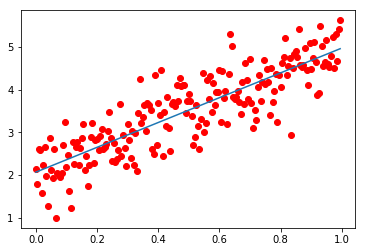

In [6]:
[a,b]=linear_regression(X, y, 5000 , 1)
linear_fit =  b*X+a
plt.plot(X,y,'ro')
plt.plot(X,linear_fit)
plt.show()


We can also use this parameters to perform future predictions:

In [7]:
def predict(z,theta):
    return theta[0]+theta[1]*z

predict(1,[a,b])

4.975218592849181

In future notebooks we will investigate how to evaluate the performance of such predictors. We also point out that even though this algorithm was implemented using only one dimensional features, the idea generalizes trivially to higher dimensional data.